## Custom Components

In [1]:
import warnings
import os
warnings.filterwarnings('ignore')

from dotenv import load_dotenv

load_dotenv()

#HF_API_TOKEN = os.getenv("HF_API_TOKEN")
OPENAI_API_TOKEN = os.getenv("OPENAI_API_TOKEN")

In [13]:
import requests

from typing import List

from haystack import Document, Pipeline, component
from haystack.components.builders import PromptBuilder
from haystack.components.generators.openai import OpenAIGenerator
from haystack.utils import Secret

## Custom Component Requirements
Requirements
Here are the requirements for all custom components:

- **@component**: This decorator marks a class as a component, allowing it to be used in a pipeline.
- **run()**: This is a required method in every component. It accepts input arguments and returns a dict. The inputs can either come from the pipeline when it’s executed, or from the output of another component when connected using connect(). The run() method should be compatible with the input/output definitions declared for the component. 


** A decorator in Python is a function that allows you to extend or modify the behavior of another function or method without directly changing its source code. Decorators are particularly useful when you want to apply the same behavior to multiple functions or classes without duplicating code.

#### Build a Custom Component


In [4]:
@component
class Greeter:

    # The following decorator defines the output types and names at the time of class definition.
    # The output names and types must match the dict returned by the run() method. 
    @component.output_types(greeting=str)
    def run(self, user_name: str):
        return {"greeting": f"Hello {user_name}"}

#### Run the Component

In [5]:
greeter = Greeter()

greeter.run(user_name="Simona")

{'greeting': 'Hello Simona'}

#### Add the Component to a Pipeline

In [6]:
greeter = Greeter()
template = """ You will be given the beginning of a dialogue. 
Create a short play script using this as the start of the play.
Start of dialogue: {{ dialogue }}
Full script: 
"""
prompt = PromptBuilder(template=template)
llm = OpenAIGenerator(api_key=Secret.from_token(OPENAI_API_TOKEN))

dialogue_builder = Pipeline()
dialogue_builder.add_component("greeter", greeter)
dialogue_builder.add_component("prompt", prompt)
dialogue_builder.add_component("llm", llm)

dialogue_builder.connect("greeter.greeting", "prompt.dialogue")
dialogue_builder.connect("prompt", "llm")

🚅 Components
  - greeter: Greeter
  - prompt: PromptBuilder
  - llm: OpenAIGenerator
🛤️ Connections
  - greeter.greeting -> prompt.dialogue (str)
  - prompt.prompt -> llm.prompt (str)

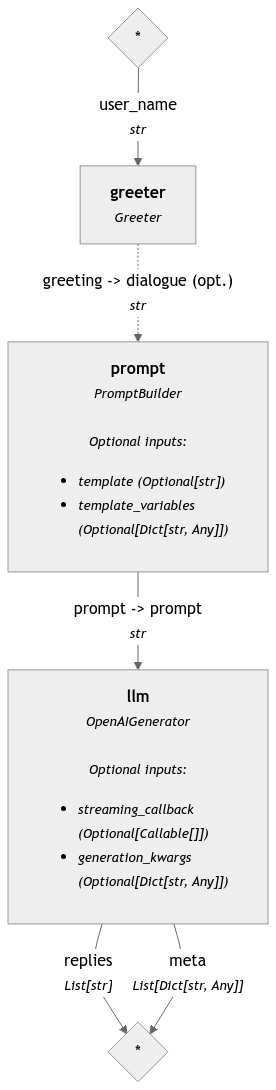

In [7]:
dialogue_builder.show()

In [9]:
dialogue = dialogue_builder.run({"greeter": {"user_name": "Simona"}})

print(dialogue["llm"]["replies"][0])

**Title: A Cup of Change**

**Setting: A cozy café with warm lighting. A few patrons are scattered at tables, sipping coffee and chatting. The sound of a steaming espresso machine fills the air.**

---

**Characters:**

- **JAMES:** A warm-hearted, slightly awkward man in his early thirties.
- **SIMONA:** A confident woman in her late twenties, with an adventurous spirit.

---

**(Scene opens with JAMES standing at the counter, nervously waiting for his order. SIMONA, sitting at a nearby table, catches his eye and smiles.)**

**SIMONA:** (cheerfully) Hello, Simona!

**JAMES:** (startled, then smiles back) Oh! Uh, hi! I didn’t expect— 

**SIMONA:** (interrupts) It’s good to see you again, James. How’s life treating you?

**JAMES:** (fidgeting) Pretty good, I guess. Just the usual grind. Work took over my life again.

**SIMONA:** (leans forward) You’ve got to find time for yourself! What happened to that adventurous spirit I saw last time?

**JAMES:** (chuckles nervously) It got buried u

In [11]:
import logging

logging.basicConfig(format="%(levelname)s - %(name)s -  %(message)s", level=logging.WARNING)
logging.getLogger("haystack").setLevel(logging.INFO)